In [1]:

%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

from   sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
df_completo = pd.read_csv("..\\Dados\\data_bank.csv", sep=";")
df_completo.head()

,Country_Name,Country_Code,Atributo,Access_to_electricity_(%_of_population),Adjusted_savings:_education_expenditure_(%_of_GNI),Adjusted_savings:_energy_depletion_(%_of_GNI),Age_dependency_ratio_(%_of_working-age_population),"Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)",GDP_deflator_(base_year_varies_by_country),GDP_growth_(annual_%),GDP_per_capita_(constant_2010_US$),GDP_per_capita_(current_US$),General_government_final_consumption_expenditure_(%_of_GDP),GNI_(current_US$),Gross_capital_formation_(%_of_GDP),Gross_fixed_capital_formation_(%_of_GDP),"Inflation,_GDP_deflator_(annual_%)",Premiums_per_capita_(USD)_-_Total
0,Albania,ALB,2001,100.0000,2.9104,0.2144,58.6865,22.7162,72.1990,8.2901,2453.6244,1281.6594,10.6260,4070817915,34.9887,36.7293,3.8139,7
1,Angola,AGO,2001,20.0000,2.9150,29.5551,99.0394,8.1564,33.6718,4.2060,2223.3346,527.3335,25.1546,7375076435,30.4932,30.4932,106.3521,5
2,Argentina,ARG,2001,95.5111,4.9200,1.6101,61.2372,4.5686,58.5657,-4.4088,7776.1395,7208.3731,14.1563,260969968100,15.6260,14.1791,-1.0958,184
3,Brazil,BRA,2001,96.0165,3.8200,0.9770,53.4422,4.8010,47.9413,1.3899,8804.3296,3156.7988,19.3433,541210449579,18.7419,18.4181,8.2251,72
4,Colombia,COL,2001,98.4700,3.9604,3.0593,59.8437,8.3210,51.5960,1.6779,4867.5823,2439.6825,16.5662,95787969671,16.0323,15.3995,6.5184,48


In [3]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 18 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Country_Name                                                 380 non-null    object 
 1   Country_Code                                                 380 non-null    object 
 2   Atributo                                                     380 non-null    int64  
 3   Access_to_electricity_(%_of_population)                      380 non-null    float64
 4   Adjusted_savings:_education_expenditure_(%_of_GNI)           380 non-null    float64
 5   Adjusted_savings:_energy_depletion_(%_of_GNI)                380 non-null    float64
 6   Age_dependency_ratio_(%_of_working-age_population)           380 non-null    float64
 7   Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)   380 non-null    flo

In [4]:
df_completo.isnull().any()

Country_Name                                                   False
Country_Code                                                   False
Atributo                                                       False
Access_to_electricity_(%_of_population)                        False
Adjusted_savings:_education_expenditure_(%_of_GNI)             False
Adjusted_savings:_energy_depletion_(%_of_GNI)                  False
Age_dependency_ratio_(%_of_working-age_population)             False
Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)     False
GDP_deflator_(base_year_varies_by_country)                     False
GDP_growth_(annual_%)                                          False
GDP_per_capita_(constant_2010_US$)                             False
GDP_per_capita_(current_US$)                                   False
General_government_final_consumption_expenditure_(%_of_GDP)    False
GNI_(current_US$)                                              False
Gross_capital_formation_(%_of_GDP)

In [5]:

evaluation = pd.DataFrame(
    {
        "Model": [],
        "Details": [],
        "Root Mean Squared Error (RMSE)": [],
        "R-squared (training)": [],
        "Adjusted R-squared (training)": [],
        "R-squared (test)": [],
        "Adjusted R-squared (test)": [],
        "5-Fold Cross Validation": []
    }
)

In [6]:
def adjusted_r2(r2, n, k):
    return r2 - (n - 1) * (1 - r2) / (n - k - 1)

In [37]:
train_data, test_data = train_test_split(df_completo, train_size=0.7, random_state=4)

independent_var = ["Adjusted_savings:_energy_depletion_(%_of_GNI)",
                    #"Age_dependency_ratio_(%_of_working-age_population)",
                    "Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)",
                    "GDP_deflator_(base_year_varies_by_country)",
                   "GDP_per_capita_(constant_2010_US$)",
                    "GDP_per_capita_(current_US$)",
                    #"General_government_final_consumption_expenditure_(%_of_GDP)",
                    "GNI_(current_US$)",
                   #"Gross_fixed_capital_formation_(%_of_GDP)",
                    #"Inflation,_GDP_deflator_(annual_%)"
                    ]
lin_reg = LinearRegression()
lin_reg.fit(train_data[independent_var], train_data["Premiums_per_capita_(USD)_-_Total"])

print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")

Intercept: 124.52332124712176
Coefficients: [-4.38430635e+00 -5.39546796e+00  3.43066869e-02 -9.17045847e-03
  1.59735942e-02  3.22932792e-11]


In [38]:
pred = lin_reg.predict(test_data[independent_var])

In [39]:
rmse = metrics.mean_squared_error(test_data["Premiums_per_capita_(USD)_-_Total"], pred)
r2_train = lin_reg.score(train_data[independent_var], train_data["Premiums_per_capita_(USD)_-_Total"])
ar2_train = adjusted_r2(
    r2_train,
    train_data.shape[0],
    len(independent_var)
)

r2_test = lin_reg.score(test_data[independent_var], test_data["Premiums_per_capita_(USD)_-_Total"])
ar2_test = adjusted_r2(
    r2_test,
    test_data.shape[0],
    len(independent_var)
)

cross_val = cross_val_score(lin_reg, df_completo[independent_var], df_completo["Premiums_per_capita_(USD)_-_Total"], cv=5).mean()

r = evaluation.shape[0]
evaluation.loc[r] = ["Multiple Linear Regression-1", "Selected features", rmse, r2_train, ar2_train, r2_test, ar2_test, cross_val]
evaluation.sort_values(by="5-Fold Cross Validation", ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
4,Multiple Linear Regression-1,Selected features,3025.734206,0.701150,0.395377,0.681704,0.345560,0.439265
3,Multiple Linear Regression-1,Selected features,2920.279904,0.705158,0.402316,0.692798,0.365308,0.420090
2,Multiple Linear Regression-1,Selected features,2844.379001,0.706682,0.404234,0.700782,0.378766,0.370657
1,Multiple Linear Regression-1,Selected features,2828.633087,0.706782,0.403255,0.702438,0.379126,0.224378
0,Multiple Linear Regression-1,Selected features,2923.631257,0.709546,0.407701,0.692445,0.355030,0.149738


In [40]:

# Retorna um array de zeros com o mesmo shape e tipo do array dado
mask = np.zeros_like(df_completo.corr(), dtype=bool)

# Retorna os índices apenas do triângulo superior do array
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

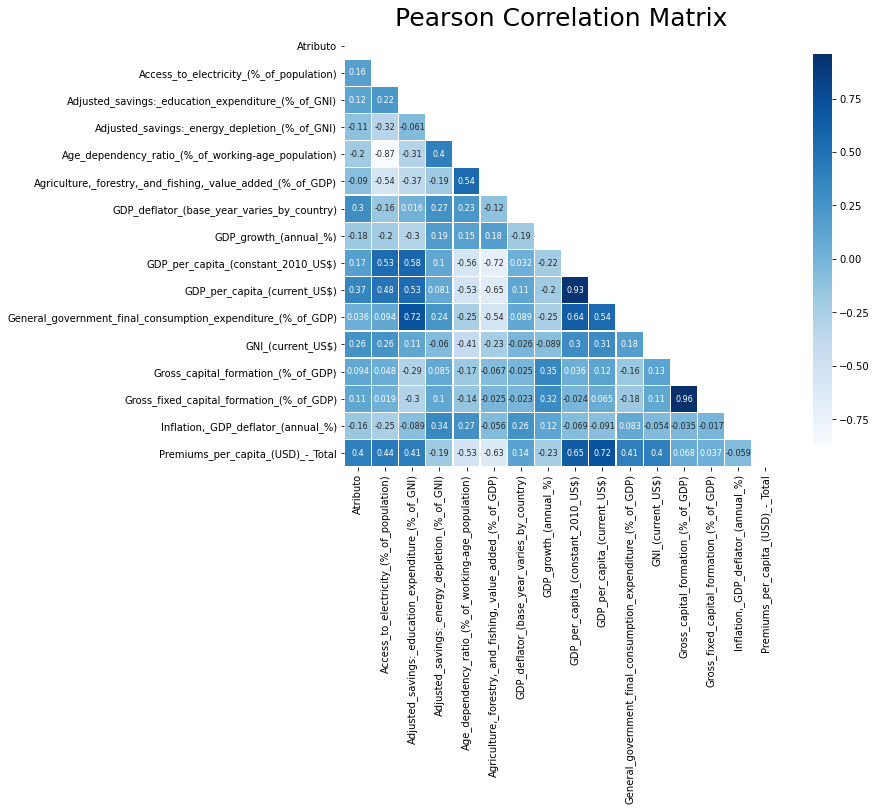

In [41]:
plt.subplots(figsize=(12, 8))
plt.title("Pearson Correlation Matrix", fontsize=25)

sns.heatmap(
    df_completo.corr(),
    linewidths=0.25,
    square=True,
    cmap="Blues",
    linecolor="w",
    annot=True,
    annot_kws={"size": 8},
    mask=mask,
    cbar_kws={"shrink": 0.9}
)

In [42]:
X = np.column_stack((
df_completo["Adjusted_savings:_energy_depletion_(%_of_GNI)"],
#df_completo["Age_dependency_ratio_(%_of_working-age_population)"],
df_completo["Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)"],
df_completo["GDP_deflator_(base_year_varies_by_country)"],
df_completo["GDP_per_capita_(constant_2010_US$)"],
df_completo["GDP_per_capita_(current_US$)"],
#df_completo["General_government_final_consumption_expenditure_(%_of_GDP)"],
df_completo["GNI_(current_US$)"],
#df_completo["Gross_fixed_capital_formation_(%_of_GDP)"],
#df_completo["Inflation,_GDP_deflator_(annual_%)"]          
                                        
                     ))
y = df_completo["Premiums_per_capita_(USD)_-_Total"]


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                                    OLS Regression Results                                   
Dep. Variable:     Premiums_per_capita_(USD)_-_Total   R-squared:                       0.697
Model:                                           OLS   Adj. R-squared:                  0.692
Method:                                Least Squares   F-statistic:                     143.1
Date:                               Mon, 01 Nov 2021   Prob (F-statistic):           1.56e-93
Time:                                       12:54:13   Log-Likelihood:                -2052.9
No. Observations:                                380   AIC:                             4120.
Df Residuals:                                    373   BIC:                             4147.
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
                 coef    std err          t      P>|t|      

In [13]:
df_completo['Human_capital'], df_completo['Monetary_policy_space'], df_completo['Fiscal_space'], 

df_completo['Financial_Market_development'],

"Fiscal_space", "Monetary_policy_space", "Human_capital", 

KeyError: 'Human_capital'

In [ ]:
cross_val_score(lin_reg, df_completo[independent_var], df_completo["Insurance_penetration"], cv=5)

In [ ]:
#df_completo["Access_to_electricity_(%_of_population)"],
#df_completo["Adjusted_savings:_education_expenditure_(%_of_GNI)"],
df_completo["Adjusted_savings:_energy_depletion_(%_of_GNI)"],
df_completo["Age_dependency_ratio_(%_of_working-age_population)"],
df_completo["Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)"],
df_completo["GDP_deflator_(base_year_varies_by_country)"],
#df_completo["GDP_growth_(annual_%)"],
df_completo["GDP_per_capita_(constant_2010_US$)"],
df_completo["GDP_per_capita_(current_US$)"],
df_completo["General_government_final_consumption_expenditure_(%_of_GDP)"],
df_completo["GNI_(current_US$)"],
#df_completo["Gross_capital_formation_(%_of_GDP)"],
df_completo["Gross_fixed_capital_formation_(%_of_GDP)"],
df_completo["Inflation,_GDP_deflator_(annual_%)"] 

In [ ]:
#"Access_to_electricity_(%_of_population)",
#"Adjusted_savings:_education_expenditure_(%_of_GNI)",
"Adjusted_savings:_energy_depletion_(%_of_GNI)",
"Age_dependency_ratio_(%_of_working-age_population)",
"Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)",
"GDP_deflator_(base_year_varies_by_country)",
#"GDP_growth_(annual_%)",
"GDP_per_capita_(constant_2010_US$)",
"GDP_per_capita_(current_US$)",
"General_government_final_consumption_expenditure_(%_of_GDP)",
"GNI_(current_US$)",
#"Gross_capital_formation_(%_of_GDP)",
"Gross_fixed_capital_formation_(%_of_GDP)",
"Inflation,_GDP_deflator_(annual_%)"